In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

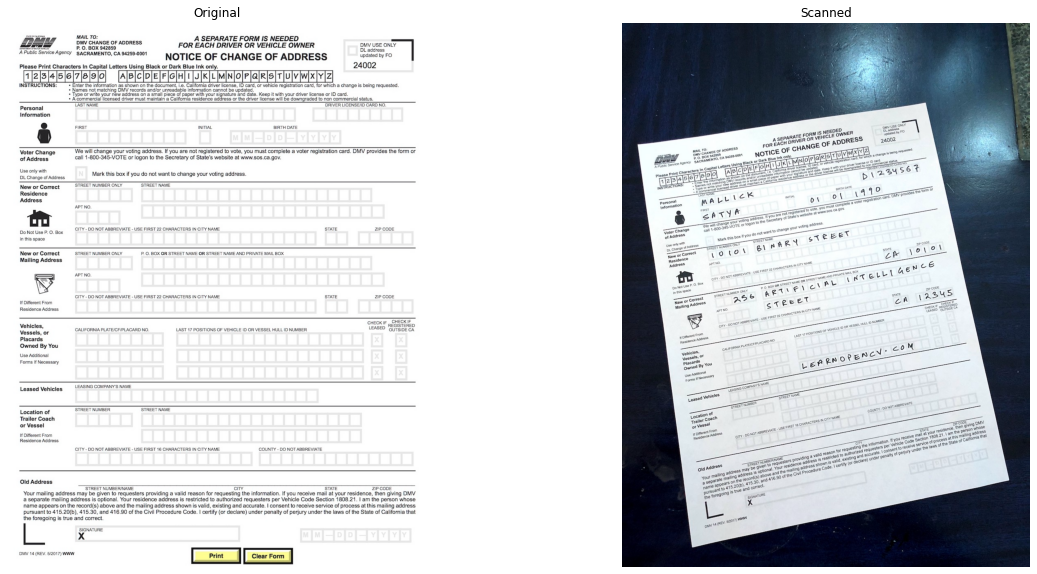

In [2]:
img_1 = cv2.imread('form.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('scanned-form.jpg', cv2.IMREAD_COLOR)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(img_1); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(img_2); plt.title('Scanned')

# ok, now find the keypoints
img1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2_gray, None)


# Ok, display the kyepoints

Text(0.5, 1.0, 'Scanned')

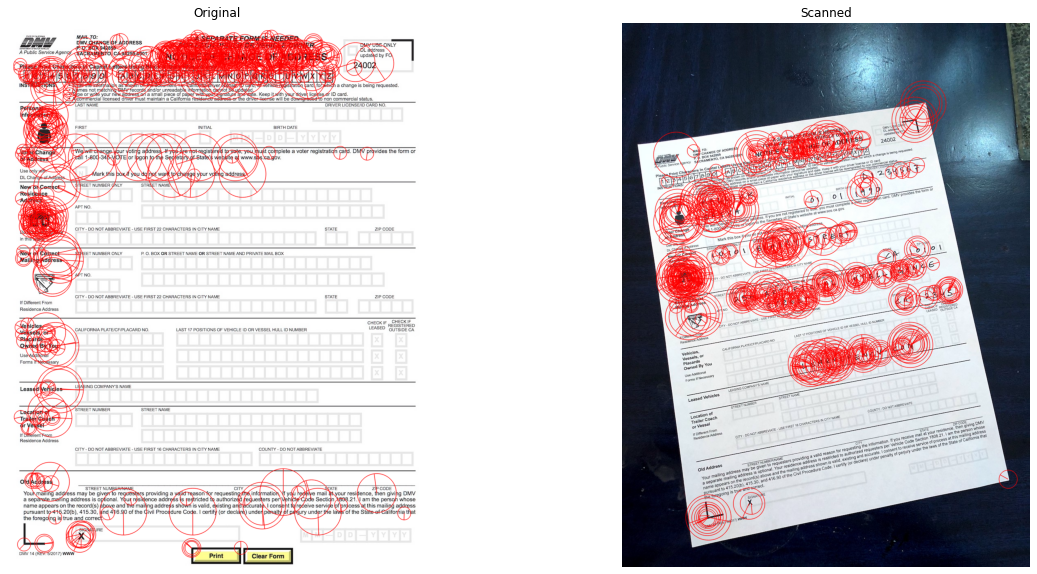

In [3]:
flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
im1_display = cv2.drawKeypoints(img_1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=flags)
im2_display = cv2.drawKeypoints(img_2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=flags)

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title('Scanned')

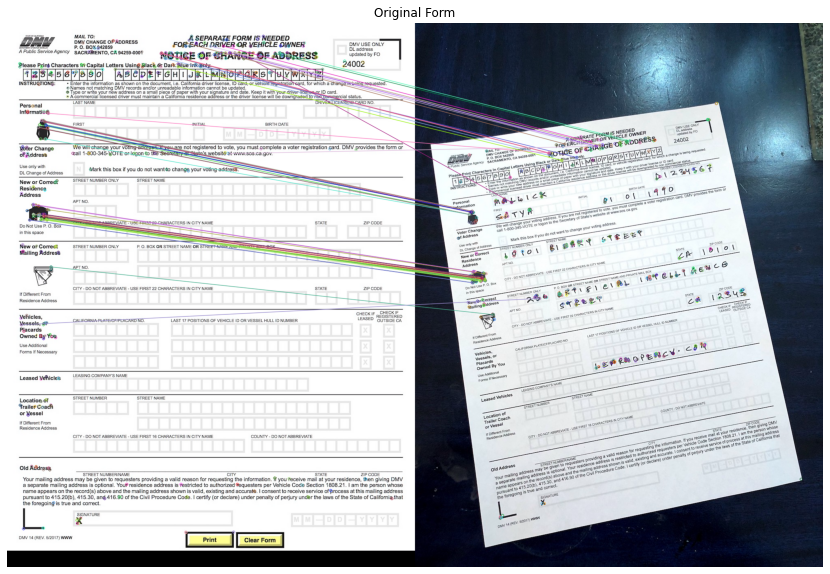

In [4]:
# Ok now begin to match two image
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
matches.sort(key=lambda x: x.distance, reverse=False)
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

# Draw top matches
im_matches = cv2.drawMatches(img_1, keypoints1, img_2, keypoints2, matches, None)
plt.figure(figsize=[40, 10])
plt.imshow(im_matches); plt.axis('off'); plt.title('Original Form');

Text(0.5, 1.0, 'Scanned Form')

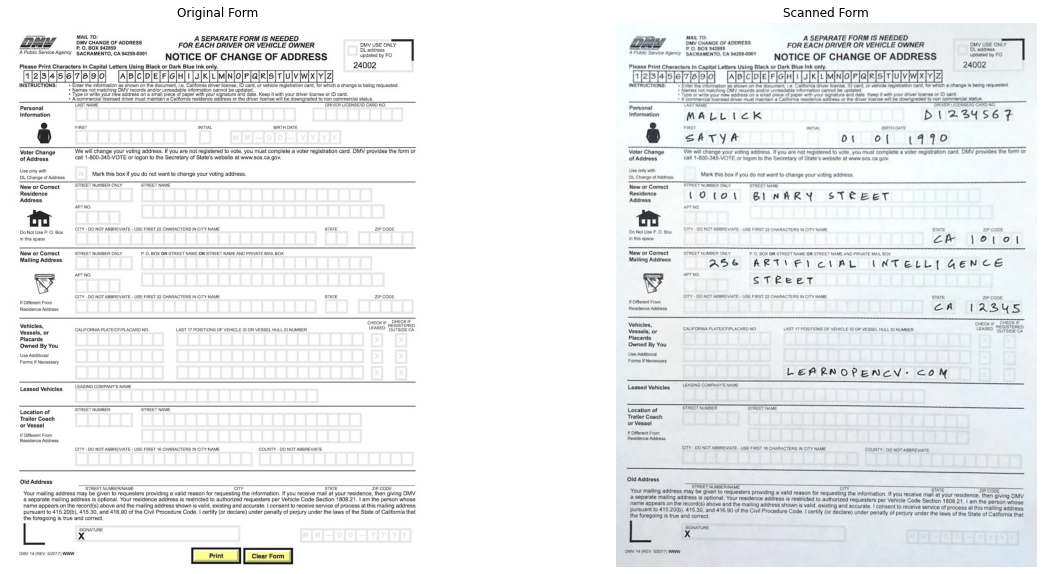

In [8]:
# fine homography
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
    
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

height, width, channels = img_1.shape
im2_reg = cv2.warpPerspective(img_2, h, (width, height))
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(img_1);plt.axis('off');plt.title('Original Form')
plt.subplot(122);plt.imshow(im2_reg);plt.axis('off');plt.title('Scanned Form')